In [1]:
#DATA PREPROCESSING USING TITANIC DATASET




from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
#importing dataset
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [7]:
index=df_train.index
length=len(index)
print(length)

891


In [8]:
index1=df_test.index
length=len(index1)
print(length)

418


In [9]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


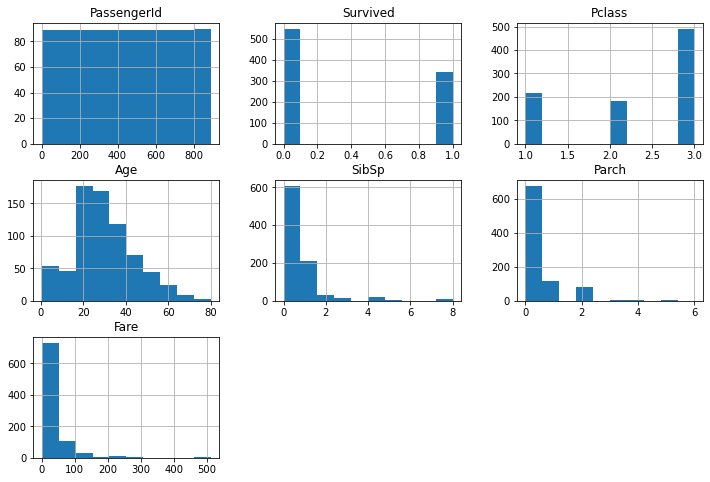

In [11]:
df_train.hist(figsize=(12,8));

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#finding out how many cells are empty
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

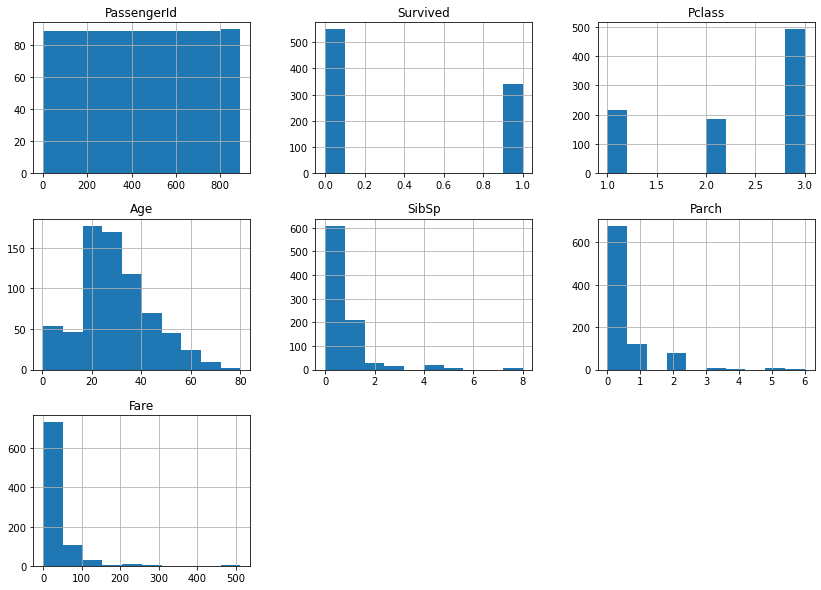

In [15]:
df_train.hist(bins=10,figsize=(14,10));

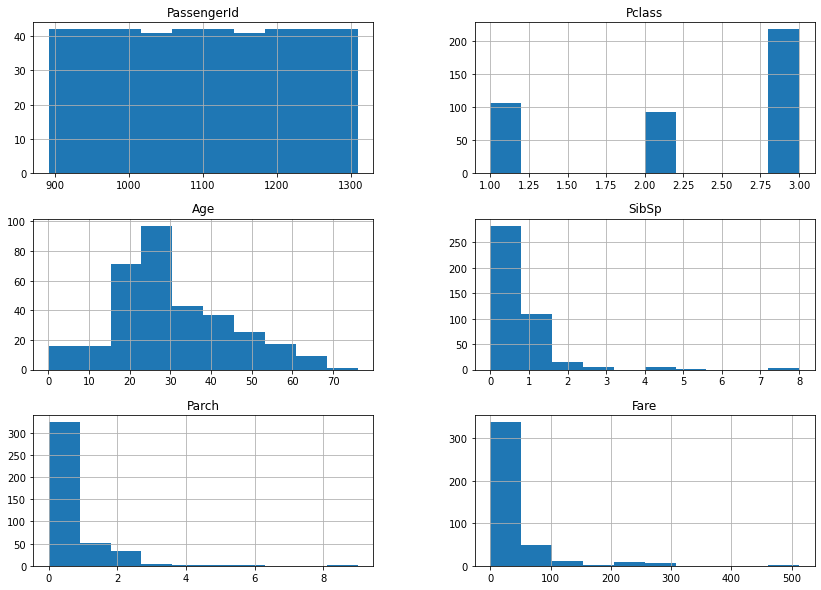

In [16]:
df_test.hist(bins=10,figsize=(14,10));

In [17]:
#separating survival coloumn from training set
#SPLITTING OF DATA

x=df_train.drop("Survived",axis=1)
y=df_train["Survived"]


In [18]:
x.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((712, 11), (712,), (179, 11), (179,))

In [22]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
782,783,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
195,196,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
284,285,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [23]:
dataset=[x_train,x_val,df_test]

In [24]:
#TITLE
#EXTRACTING TITLES OF DIFFERENT PASSANGERS

In [25]:
title={'Capt':5,
 'Col':5,
 'Countess':5,
 'Don':5,
 'Dona':5,     
 'Dr':5,
 'Jonkheer':5,
 'Lady':5,
 'Major':5,
 'Master':4,
 'Miss':3,
 'Mlle':5,
 'Mme':5,
 'Mr':1,
 'Mrs':2,
 'Ms':5,
 'Rev':5,
 'Sir':5}

In [26]:
for df in dataset:
    df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False).map(title)

<ipython-input-26-550411c80cbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False).map(title)


In [27]:
x_train.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
782,783,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,1
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,2
195,196,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,3
284,285,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,1
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,3
641,642,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,5
171,172,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q,4
845,846,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,1
150,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,5
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,1


In [28]:
#CABIN
#EXTRACTING THE CABIN OF DIFFERENT PASSANGERS{FIRST,SECOND,THIRD}


In [29]:
x_train["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
F2             3
              ..
D45            1
B18            1
C49            1
A24            1
C99            1
Name: Cabin, Length: 129, dtype: int64

In [30]:
x_val["Cabin"].value_counts()

G6                 3
E101               2
D17                2
D20                2
E25                1
C45                1
C62 C64            1
A16                1
B57 B59 B63 B66    1
B39                1
A6                 1
C101               1
C52                1
D37                1
F G63              1
D19                1
B37                1
E67                1
B58 B60            1
E31                1
C68                1
E36                1
B18                1
B71                1
E44                1
D                  1
D26                1
B49                1
E12                1
B42                1
C54                1
D36                1
Name: Cabin, dtype: int64

In [31]:
set(x_train["Cabin"])

{'A10',
 'A14',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B38',
 'B4',
 'B41',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E121',
 'E17',
 'E24',
 'E25',
 'E33',
 'E34',
 'E38',
 'E40',
 'E44',
 'E46',
 'E49',
 'E50',
 'E58',
 'E63',
 'E67',
 'E6

In [32]:
set(x_train["Cabin"])

{'A10',
 'A14',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B38',
 'B4',
 'B41',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E121',
 'E17',
 'E24',
 'E25',
 'E33',
 'E34',
 'E38',
 'E40',
 'E44',
 'E46',
 'E49',
 'E50',
 'E58',
 'E63',
 'E67',
 'E6

In [33]:
set(x_val["Cabin"])

{'A16',
 'A6',
 'B18',
 'B37',
 'B39',
 'B42',
 'B49',
 'B57 B59 B63 B66',
 'B58 B60',
 'B71',
 'C101',
 'C45',
 'C52',
 'C54',
 'C62 C64',
 'C68',
 'D',
 'D17',
 'D19',
 'D20',
 'D26',
 'D36',
 'D37',
 'E101',
 'E12',
 'E25',
 'E31',
 'E36',
 'E44',
 'E67',
 'F G63',
 'G6',
 nan}

In [34]:
cabin = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}




In [35]:
for df in dataset:
    df['Cabin'] = df['Cabin'].str[:1]

<ipython-input-35-b098b8f0be92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].str[:1]


In [36]:
for df in dataset:
    df['Cabin'] = df['Cabin'].map(cabin)

<ipython-input-36-babd8509a144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = df['Cabin'].map(cabin)


In [37]:
x_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          545
Embarked         2
Title            0
dtype: int64

In [38]:
x_train.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
782,783,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0,3.0,S,1
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4,NaN,S,2


In [39]:
x_train["Cabin"].value_counts()

2.0    53
1.0    39
4.0    24
3.0    24
0.0    13
5.0    12
7.0     1
6.0     1
Name: Cabin, dtype: int64

In [40]:
#Filling the empty places in the column with the median of the values or the most possible value.

In [41]:
#1.AGE

In [42]:
for df in dataset:
    df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)

/home/bharath/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [43]:
x_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          545
Embarked         2
Title            0
dtype: int64

In [44]:
#2.CABIN

In [45]:
for df in dataset:
    df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [46]:
x_train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

In [47]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

In [48]:
x_val.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [49]:
#3 FARE

In [50]:
x_train["Fare"].value_counts()

7.8958     36
8.0500     35
13.0000    31
7.7500     28
26.0000    22
           ..
14.1083     1
36.7500     1
10.1708     1
7.8875      1
30.0708     1
Name: Fare, Length: 227, dtype: int64

In [51]:
df_test["Fare"].fillna(8.050,inplace=True)

In [52]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [53]:
df_test.isna().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [54]:
x_train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

In [55]:
x_val.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [56]:
#4.EMBARKED

In [57]:
 x_train["Embarked"].value_counts()

S    512
C    135
Q     63
Name: Embarked, dtype: int64

In [58]:
x_train["Embarked"].fillna("S",inplace=True)

In [59]:
x_train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [60]:
x_val["Embarked"].fillna("S",inplace=True)

In [61]:
#REMOVAL OF UNNECESSARY COLUMNS

In [62]:
for df in dataset:
    df.drop("Name",axis=1,inplace=True)
    df.drop("Ticket",axis=1,inplace=True)

/home/bharath/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
#TRANSFORMING COLUMNS

In [64]:
#1.SEX

In [65]:
sex = {"male": 0, "female": 1}
for df in dataset:
    df['Sex'] = df['Sex'].map(sex)

<ipython-input-65-26fba44d15b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map(sex)


In [66]:
x_train.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
782,783,1,0,29.0,0,0,30.0000,3.0,S,1
423,424,3,1,28.0,1,1,14.4000,5.0,S,2
195,196,1,1,58.0,0,0,146.5208,1.0,C,3


In [67]:
#2.EMBARKED

In [68]:
x_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [69]:
x_val.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [70]:
categorical_feature_mask = x_train.dtypes==object
categorical_cols = x_train.columns[categorical_feature_mask].tolist()
labeled_df = x_train[categorical_cols]
enc = OneHotEncoder()
enc.fit(labeled_df)
onehotlabels = enc.transform(labeled_df).toarray()
new_columns=list()
for col, values in zip(labeled_df.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value) for value in values])
x_train= pd.concat([x_train.reset_index(), pd.DataFrame(onehotlabels, columns=new_columns)],
 axis='columns')

In [71]:
labeled_df2=x_val[categorical_cols]
enc.fit(labeled_df2)
onehotlabels2=enc.transform(labeled_df2).toarray()
x_val=pd.concat([x_val.reset_index(),pd.DataFrame(onehotlabels2,columns=new_columns)],axis='columns')

In [72]:
labeled_df3=df_test[categorical_cols]
enc.fit(labeled_df3)
onehotlabels3=enc.transform(labeled_df3).toarray()
df_test=pd.concat([df_test.reset_index(),pd.DataFrame(onehotlabels3,columns=new_columns)],axis='columns')

In [73]:
df_test.isna().sum()

index          0
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [74]:
x_train.isna().sum()

index          0
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [75]:
x_val.isna().sum()

index          0
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [76]:
#removing embarked column
x_train.drop("Embarked",axis=1,inplace=True)
df_test.drop("Embarked",axis=1,inplace=True)

In [77]:
o#creating model 

In [78]:
#choosing randomforest model for data

In [79]:
x_train.head(2)

,index,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S
0,0,892,3,0,34.5,0,0,7.8292,5.0,1,0.0,1.0,0.0
1,1,893,3,1,47.0,1,0,7.0000,5.0,2,0.0,0.0,1.0
2,2,894,2,0,62.0,0,0,9.6875,5.0,1,0.0,1.0,0.0
3,3,895,3,0,27.0,0,0,8.6625,5.0,1,0.0,0.0,1.0
4,4,896,3,1,22.0,1,1,12.2875,5.0,2,0.0,0.0,1.0


In [80]:
rf=RandomForestClassifier()

In [81]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
prediction=rf.predict(df_test)
result=pd.DataFrame({"PassengerId":df_test["PassengerId"],
                    "Survived":prediction})

In [83]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
